# Deep Learning Analysis on CIFAR-10 dataset

Using the Canadian Institute For Advanced Research dataset included with Keras.

The CIFAR-10 dataset is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
### Setting up the data

Setting up a training set and a test set. The test set is large enough to give a reasonably accurate assessment of the error-rate (or loss) of the models. The learning curve experiment further in this notebook, constructing training sets of different sizes.

## Set up CNN Model 

Set up a CNN model using Keras. Training on an intermediate-sized dataset. 

###  1. CNN Model: Initial  Assessment

The model is complex enough to *overfit* the training data: that the loss/error-rate on the validation set should be higher than the training set. 

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [1, 2, 7, 8, 3]
Corresponding classes for the labels: ['automobile', 'bird', 'horse', 'ship', 'cat']


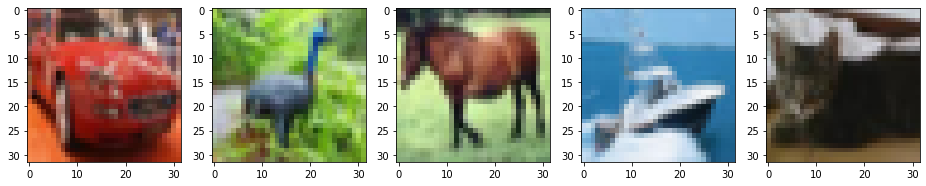

In [2]:
import matplotlib.pyplot as plt
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[5:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[5:10]]))
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)
for i in range(5):
    img = X_train[i+5]
    axarr[i].imshow(img)
plt.show()

In [3]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# factorizing the labels, rescaling the pixel data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_train = X_train / 255
X_test = X_test / 255
# reducing the train size
X_train = x_train[0:20000]
y_train = y_train[0:20000]
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [4]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Model 1: Convolution Neural Network
def CNN(X_train, y_train, x_test, y_test, dropout):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 1st Dropout layer
    if dropout:
        model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # 2nd Dropout layer
    if dropout:
        model.add(Dropout(0.75))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
    history = model.fit(X_train, y_train, batch_size=32, epochs=11, verbose=2, validation_data=(x_test,y_test))
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    print(model.metrics_names)
    print(score)
    return history
# Plot function for loss/error-rate
def plot_error(plot,model):  
    plt.plot(plot.history['loss'])
    plt.plot(plot.history['val_loss'])
    plt.title(model +' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
    plt.show()
CNN_plot = CNN(X_train, y_train, X_test, y_test, dropout = False)

Epoch 1/11
625/625 - 40s - loss: 1.6959 - accuracy: 0.3858 - val_loss: 1.4068 - val_accuracy: 0.4907
Epoch 2/11
625/625 - 30s - loss: 1.2736 - accuracy: 0.5465 - val_loss: 1.2565 - val_accuracy: 0.5497
Epoch 3/11
625/625 - 31s - loss: 1.0376 - accuracy: 0.6313 - val_loss: 1.1634 - val_accuracy: 0.5948
Epoch 4/11
625/625 - 31s - loss: 0.8111 - accuracy: 0.7117 - val_loss: 1.2206 - val_accuracy: 0.5906
Epoch 5/11
625/625 - 27s - loss: 0.5748 - accuracy: 0.7986 - val_loss: 1.2908 - val_accuracy: 0.6045
Epoch 6/11
625/625 - 27s - loss: 0.3610 - accuracy: 0.8745 - val_loss: 1.4661 - val_accuracy: 0.5988
Epoch 7/11
625/625 - 26s - loss: 0.2281 - accuracy: 0.9245 - val_loss: 1.7008 - val_accuracy: 0.6005
Epoch 8/11
625/625 - 34s - loss: 0.1357 - accuracy: 0.9561 - val_loss: 2.1023 - val_accuracy: 0.5867
Epoch 9/11
625/625 - 27s - loss: 0.1232 - accuracy: 0.9592 - val_loss: 2.0703 - val_accuracy: 0.5998
Epoch 10/11
625/625 - 28s - loss: 0.0753 - accuracy: 0.9752 - val_loss: 2.4287 - val_accura

'Loss' = 2.5531258583068848 | 'Accuracy' = 0.5950000286102295

### CNN: Loss against number of epochs

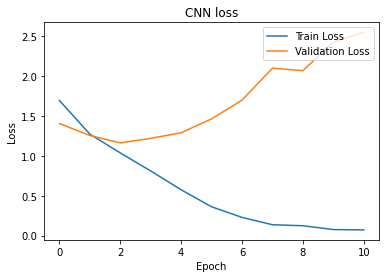

In [5]:
plot_error(CNN_plot, "CNN")

### 2. CNN Model: Regularisation experiment with dropout

Selecting dropout regularisation and training the initial model with different amounts of regularisation.

A small amount of regularisation may improve the validation set performance of the initial overfitted model. Too much regularisation may make performance on the validation set worse. 

In [6]:
CNN_plot = CNN(X_train, y_train, X_test, y_test, dropout = True)

Epoch 1/11
625/625 - 29s - loss: 2.0486 - accuracy: 0.2384 - val_loss: 1.7097 - val_accuracy: 0.3575
Epoch 2/11
625/625 - 28s - loss: 1.7573 - accuracy: 0.3525 - val_loss: 1.5837 - val_accuracy: 0.4241
Epoch 3/11
625/625 - 28s - loss: 1.6248 - accuracy: 0.4037 - val_loss: 1.4587 - val_accuracy: 0.4809
Epoch 4/11
625/625 - 27s - loss: 1.5415 - accuracy: 0.4423 - val_loss: 1.3563 - val_accuracy: 0.5217
Epoch 5/11
625/625 - 27s - loss: 1.4719 - accuracy: 0.4604 - val_loss: 1.3605 - val_accuracy: 0.5036
Epoch 6/11
625/625 - 27s - loss: 1.4061 - accuracy: 0.4900 - val_loss: 1.3245 - val_accuracy: 0.5210
Epoch 7/11
625/625 - 27s - loss: 1.3555 - accuracy: 0.5099 - val_loss: 1.2618 - val_accuracy: 0.5567
Epoch 8/11
625/625 - 29s - loss: 1.3107 - accuracy: 0.5343 - val_loss: 1.1971 - val_accuracy: 0.5761
Epoch 9/11
625/625 - 27s - loss: 1.2686 - accuracy: 0.5419 - val_loss: 1.2064 - val_accuracy: 0.5683
Epoch 10/11
625/625 - 27s - loss: 1.2168 - accuracy: 0.5643 - val_loss: 1.1797 - val_accura

'Loss' = 1.139532208442688 | 'Accuracy' = 0.5975000262260437

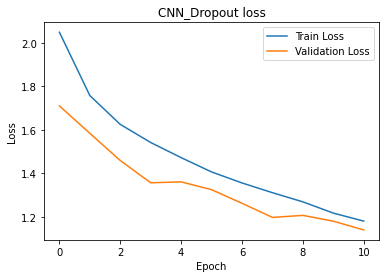

In [7]:
plot_error(CNN_plot, "CNN_Dropout")

### 3. CNN Model: Learning curve experiment:

Training the model (with dropout regularisation) on different amounts of training data and describing the approximate relationship between the training set size and loss / error-rate.

In [8]:
train_size = [500, 1000, 2000, 4000, 8000]  
cnn_plots = []
for i in range(5):
    hist = CNN(x_train[0:train_size[i]],y_train[0:train_size[i]], X_test, y_test, True)
    cnn_plots.append(hist)
def plot_learning_curve(a, train_size):
    n1 = []
    loss = []
    val = []
    for i in range(len(train_size)):   
        n1.append("Training Loss "+str(i+1))
        n1.append("Validation Loss"+str(i+1))
        loss.append(a[i].history['loss'][-1])
        val.append(a[i].history['val_loss'][-1])
    plt.plot(train_size,loss)
    plt.plot(train_size,val) 
    plt.legend(n1, loc='upper right')
    plt.title('Relation between Training Size and Loss/Error-Rate')
    plt.ylabel('Loss/Error-Rate')
    plt.xlabel('Train Size')
    plt.show()

Epoch 1/11
16/16 - 4s - loss: 2.3109 - accuracy: 0.1180 - val_loss: 2.2995 - val_accuracy: 0.1227
Epoch 2/11
16/16 - 3s - loss: 2.3023 - accuracy: 0.1200 - val_loss: 2.2973 - val_accuracy: 0.1001
Epoch 3/11
16/16 - 3s - loss: 2.2878 - accuracy: 0.1480 - val_loss: 2.2937 - val_accuracy: 0.1000
Epoch 4/11
16/16 - 2s - loss: 2.2737 - accuracy: 0.1560 - val_loss: 2.2692 - val_accuracy: 0.1024
Epoch 5/11
16/16 - 3s - loss: 2.2356 - accuracy: 0.1680 - val_loss: 2.2088 - val_accuracy: 0.1607
Epoch 6/11
16/16 - 3s - loss: 2.1463 - accuracy: 0.2100 - val_loss: 2.1310 - val_accuracy: 0.2568
Epoch 7/11
16/16 - 2s - loss: 2.0896 - accuracy: 0.2460 - val_loss: 2.1195 - val_accuracy: 0.2484
Epoch 8/11
16/16 - 2s - loss: 2.0790 - accuracy: 0.2180 - val_loss: 2.0304 - val_accuracy: 0.2690
Epoch 9/11
16/16 - 2s - loss: 1.9804 - accuracy: 0.2880 - val_loss: 1.9914 - val_accuracy: 0.2989
Epoch 10/11
16/16 - 2s - loss: 1.9705 - accuracy: 0.2880 - val_loss: 1.9480 - val_accuracy: 0.3168
Epoch 11/11
16/16 -

'Loss' = 1.3295726776123047 | 'Accuracy' = 0.5236999988555908

Plotting the performance (loss/error-rate) of the model on the validation set against the size of the training set.

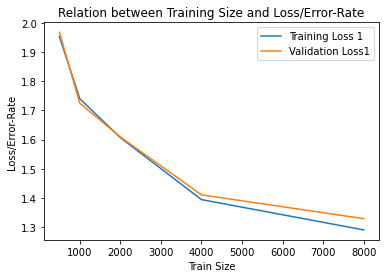

In [9]:
plot_learning_curve(cnn_plots, train_size)

## Set up MLP Model 

Set up a MLP model using Keras. Training on an intermediate-sized dataset. 

###  1. MLP Model: Initial  Assessment

The model is complex enough to *overfit* the training data: that the loss/error-rate on the validation set should be higher than the training set.

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
# reducing the train size
X_train = X_train[0:20000]
y_train = y_train[0:20000]

In [11]:
def MLP(X_train, y_train, x_test, y_test, dropout):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=3072))
    model.add(Dense(256, activation='relu'))
    # 1st Dropout layer
    if dropout:
        model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # 2nd Dropout layer
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train,y_train, epochs=30, batch_size=128, verbose=2, validation_data=(x_test,y_test))
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    print(model.metrics_names)
    print(score)
    return history
MLP_plot = MLP(X_train, y_train, X_test, y_test, dropout = False)

C:\Users\tarun\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
157/157 - 3s - loss: 1.9458 - accuracy: 0.2948 - val_loss: 1.8017 - val_accuracy: 0.3430
Epoch 2/30
157/157 - 1s - loss: 1.7343 - accuracy: 0.3769 - val_loss: 1.6980 - val_accuracy: 0.3919
Epoch 3/30
157/157 - 1s - loss: 1.6440 - accuracy: 0.4150 - val_loss: 1.7269 - val_accuracy: 0.3719
Epoch 4/30
157/157 - 1s - loss: 1.5799 - accuracy: 0.4345 - val_loss: 1.6410 - val_accuracy: 0.4006
Epoch 5/30
157/157 - 1s - loss: 1.5247 - accuracy: 0.4550 - val_loss: 1.5478 - val_accuracy: 0.4496
Epoch 6/30
157/157 - 1s - loss: 1.4847 - accuracy: 0.4715 - val_loss: 1.6449 - val_accuracy: 0.4017
Epoch 7/30
157/157 - 1s - loss: 1.4410 - accuracy: 0.4857 - val_loss: 1.5171 - val_accuracy: 0.4536
Epoch 8/30
157/157 - 1s - loss: 1.4055 - accuracy: 0.5010 - val_loss: 1.5350 - val_accuracy: 0.4575
Epoch 9/30
157/157 - 1s - loss: 1.3771 - accuracy: 0.5082 - val_loss: 1.8636 - val_accuracy: 0.3577
Epoch 10/30
157/157 - 1s - loss: 1.3473 - accuracy: 0.5229 - val_loss: 1.5469 - val_accuracy: 0.4482

'Loss' = 1.6750378608703613 | 'Accuracy' = 0.4779999852180481

### MLP: Loss against number of epochs

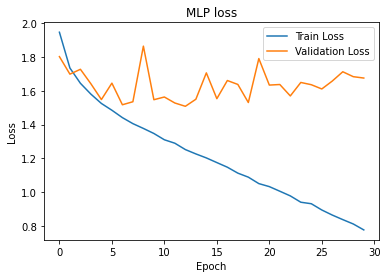

In [12]:
plot_error(MLP_plot, "MLP")

###### As the training size increases loss decreases exponentially.

### 2. MLP Model: Regularisation experiment with dropout

Selecting dropout regularisation and training the initial model with different amounts of regularisation.

A small amount of regularisation may improve the validation set performance of the initial overfitted model. Too much regularisation may make performance on the validation set worse. 

In [13]:
MLP_plot = MLP(X_train, y_train, X_test, y_test, dropout = True)

Epoch 1/30
157/157 - 2s - loss: 2.0853 - accuracy: 0.2264 - val_loss: 1.8931 - val_accuracy: 0.3203
Epoch 2/30
157/157 - 1s - loss: 1.8994 - accuracy: 0.3087 - val_loss: 1.7862 - val_accuracy: 0.3627
Epoch 3/30
157/157 - 1s - loss: 1.8215 - accuracy: 0.3425 - val_loss: 1.8624 - val_accuracy: 0.3332
Epoch 4/30
157/157 - 1s - loss: 1.7746 - accuracy: 0.3625 - val_loss: 1.6923 - val_accuracy: 0.3934
Epoch 5/30
157/157 - 1s - loss: 1.7272 - accuracy: 0.3785 - val_loss: 1.7416 - val_accuracy: 0.3615
Epoch 6/30
157/157 - 1s - loss: 1.6956 - accuracy: 0.3956 - val_loss: 1.6885 - val_accuracy: 0.3788
Epoch 7/30
157/157 - 1s - loss: 1.6602 - accuracy: 0.4069 - val_loss: 1.6562 - val_accuracy: 0.4098
Epoch 8/30
157/157 - 1s - loss: 1.6259 - accuracy: 0.4223 - val_loss: 1.6084 - val_accuracy: 0.4226
Epoch 9/30
157/157 - 1s - loss: 1.6064 - accuracy: 0.4268 - val_loss: 1.5675 - val_accuracy: 0.4405
Epoch 10/30
157/157 - 1s - loss: 1.5769 - accuracy: 0.4384 - val_loss: 1.5564 - val_accuracy: 0.4483

'Loss' = 1.4775031805038452 | 'Accuracy' = 0.48240000009536743

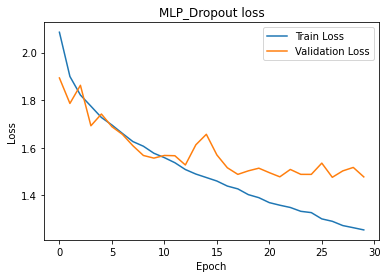

In [14]:
plot_error(MLP_plot, "MLP_Dropout")

### 3. MLP Model: Learning curve experiment:

Training the model (with dropout regularisation) on different amounts of training data and describing the approximate relationship between the training set size and loss / error-rate.

In [15]:
mlp_plots = [] 
for i in range(5):
    hist = MLP(X_train[0:train_size[i]],y_train[0:train_size[i]], X_test, y_test, True)
    mlp_plots.append(hist)

Epoch 1/30
4/4 - 2s - loss: 2.3779 - accuracy: 0.0940 - val_loss: 2.2768 - val_accuracy: 0.1450
Epoch 2/30
4/4 - 0s - loss: 2.3076 - accuracy: 0.1200 - val_loss: 2.2577 - val_accuracy: 0.1634
Epoch 3/30
4/4 - 0s - loss: 2.2673 - accuracy: 0.1420 - val_loss: 2.2427 - val_accuracy: 0.1536
Epoch 4/30
4/4 - 0s - loss: 2.2348 - accuracy: 0.1640 - val_loss: 2.2157 - val_accuracy: 0.1857
Epoch 5/30
4/4 - 0s - loss: 2.1922 - accuracy: 0.1880 - val_loss: 2.1919 - val_accuracy: 0.2137
Epoch 6/30
4/4 - 0s - loss: 2.1733 - accuracy: 0.1720 - val_loss: 2.1550 - val_accuracy: 0.2499
Epoch 7/30
4/4 - 0s - loss: 2.1493 - accuracy: 0.2220 - val_loss: 2.1212 - val_accuracy: 0.2630
Epoch 8/30
4/4 - 0s - loss: 2.0680 - accuracy: 0.2460 - val_loss: 2.0989 - val_accuracy: 0.2489
Epoch 9/30
4/4 - 0s - loss: 2.0813 - accuracy: 0.2540 - val_loss: 2.0749 - val_accuracy: 0.2601
Epoch 10/30
4/4 - 0s - loss: 2.0358 - accuracy: 0.2420 - val_loss: 2.0597 - val_accuracy: 0.2646
Epoch 11/30
4/4 - 0s - loss: 2.0188 - a

'Loss' = 1.6214953660964966 | 'Accuracy' = 0.4408000111579895

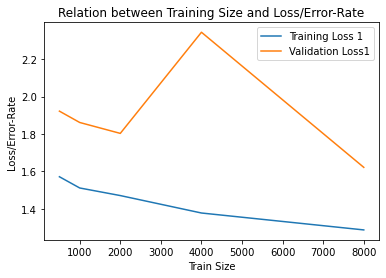

In [16]:
plot_learning_curve(mlp_plots, train_size)

###### As the training size increases loss decreases exponentially.

# Final Task

Comparing the performance of CNN and MLP models on the training and validation set with reguralisation.

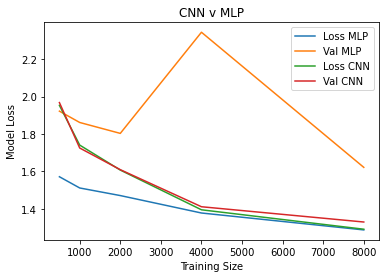

In [17]:
loss_mlp = []
loss_cnn = []
val_mlp = []
val_cnn = []
for i in range(len(train_size)):
    loss_cnn.append(cnn_plots[i].history['loss'][-1])
    val_cnn.append(cnn_plots[i].history['val_loss'][-1])
    loss_mlp.append(mlp_plots[i].history['loss'][-1])
    val_mlp.append(mlp_plots[i].history['val_loss'][-1])
plt.plot(train_size, loss_mlp)
plt.plot(train_size, val_mlp)
plt.plot(train_size, loss_cnn)
plt.plot(train_size, val_cnn)
plt.title('CNN v MLP')
plt.ylabel('Model Loss')
plt.xlabel('Training Size')
plt.legend(['Loss MLP', 'Val MLP','Loss CNN', 'Val CNN'], loc='best')
plt.show()

I developed a MLP model which I thought would be better than CNN model but the accuracy for the dataset dropped significantly. Also after applying regularisation to the initial network the loss decreased by approximately 12% as compared to the 13% of the CNN model. In both the models the learning curve is exponentially decreasing as training size increases.

Overall, CNN was a better model for the fashion CIFAR-10 dataset.